<a href="https://colab.research.google.com/github/Tclack88/MatlabSucks/blob/main/eng_mech/Instron_compression_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from numpy import pi

In [24]:
al_dat = "https://raw.githubusercontent.com/Tclack88/MatlabSucks/main/eng_mech/G04/M2_G4W4_Al_1.csv"
cer_dat = "https://raw.githubusercontent.com/Tclack88/MatlabSucks/main/eng_mech/G04/M2_G4W4_Cer_1.csv"
pvc_dat = "https://raw.githubusercontent.com/Tclack88/MatlabSucks/main/eng_mech/G04/M2_G4W4_%20PVC_1.csv"

old_cols = ['Compressive displacement', 'Primary force measurement', 'Time measurement']
new_cols = ['disp', 'force', 'time'] # displacement (mm), force (kN), time (s)
cols = dict(zip(old_cols, new_cols))

In [122]:
# tabularize specimen data
al = pd.read_csv(al_dat)[1:].rename(columns = cols).astype(float)
pvc = pd.read_csv(pvc_dat)[1:].rename(columns = cols).astype(float)
cer = pd.read_csv(cer_dat)[1:].rename(columns = cols).astype(float)

# measurements (lengths and diameters in mm)
al_l = 17.80
al_d = 11.93

cer_l = 24.93
cer_d = 11.45
cer_di1 = 4.05
cer_di2 = 4.08

pvc_l = 40.74
pvc_d = 21.06



def Area(d):
  # given diameter (mm), returns area in mm^2
  return pi*(d/2)**2

A_al = Area(al_d)
A_pvc = Area(pvc_d)
A_cer = Area(cer_d) - Area(cer_di1) - Area(cer_di2) # subtract areas from holes

al.head()

,disp,force,time
1,0.00000,0.00009,0.00
2,0.00005,0.00042,0.02
3,0.00027,0.00039,0.04
4,0.00095,0.00021,0.06
5,0.00139,-0.00016,0.08


In [123]:
al['stress'] = al.force/A_al
pvc['stress'] = pvc.force/A_pvc
cer['stress'] = cer.force/A_cer

al['strain'] = al.disp/al_l
pvc['strain'] = pvc.disp/pvc_l
cer['strain'] = cer.disp/cer_l

al.head()

,disp,force,time,stress,strain
1,0.00000,0.00009,0.00,8.051406e-07,0.000000
2,0.00005,0.00042,0.02,3.757323e-06,0.000003
3,0.00027,0.00039,0.04,3.488943e-06,0.000015
4,0.00095,0.00021,0.06,1.878661e-06,0.000053
5,0.00139,-0.00016,0.08,-1.431361e-06,0.000078


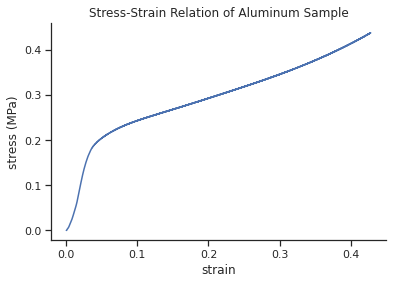

In [124]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sb.set_theme(style='ticks', rc=custom_params)

plot = sb.lineplot(x=al.strain, y=al.stress);
plot.set(title='Stress-Strain Relation of Aluminum Sample');
plot.set(ylabel='stress (MPa)');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


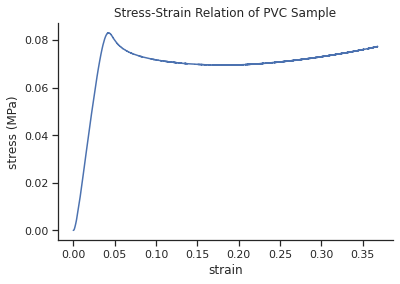

In [125]:
plot = sb.lineplot(pvc.strain, pvc.stress);
plot.set(title='Stress-Strain Relation of PVC Sample');
plot.set(ylabel='stress (MPa)');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


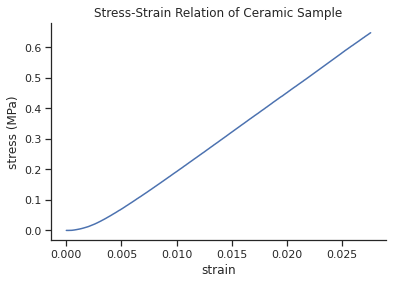

In [126]:
plot = sb.lineplot(cer.strain,cer.stress);
plot.set(title='Stress-Strain Relation of Ceramic Sample');
plot.set(ylabel='stress (MPa)');

In [86]:
al.shape

(9148, 5)

In [128]:
def find_neighbor(col, val):
  #returns an row with a col very close to the given value
  for i,value in enumerate(col):
    if value >= val:
      break
  return i

def youngs_modulus(dat, low, high):
  # Given dataframat (dat), and two values for STRESS (low and high) obtained from inspection
  # this will return the slope, i.e. young's modulus
  row1 = find_neighbor(dat.stress, low) # get index of column containing ~ low estimate
  row2 = find_neighbor(dat.stress, high) # get index of column containing ~ high estimate

  rise = dat.loc[row2,:].stress - dat.loc[row1,:].stress
  run = dat.loc[row2,:].strain - dat.loc[row1,:].strain
  E = rise/run # young's modulus = slope

  return E


E_al = youngs_modulus(al, .05, .15)
E_pvc = youngs_modulus(pvc, .01, .07)
E_cer = youngs_modulus(cer, .1, .6)

print(f'Al - {round(E_al,2)} MPa')
print(f'pvc - {round(E_pvc,2)} MPa')
print(f'cer - {round(E_cer,2)} MPa')

Al - 6.87 MPa
pvc - 2.42 MPa
cer - 25.73 MPa
